In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2022-12-21'

stock='GOOG'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [8]:
data.reset_index(inplace=True)

In [10]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [11]:
ma_100_days = data.Close.rolling(100).mean

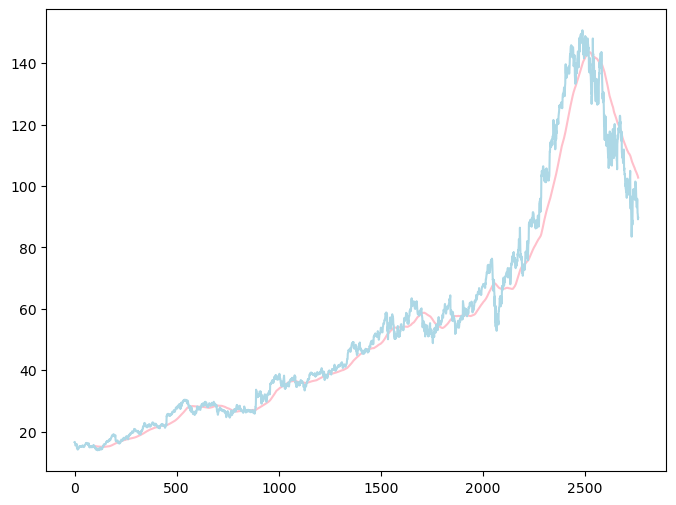

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'pink')
plt.plot(data.Close, 'lightblue')
plt.show()

In [23]:
data.dropna(inplace=True)

In [27]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)]) 

In [28]:
data_train.shape[0]

2208

In [30]:
data_test.shape[0]

553

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_train_scale = scaler.fit_transform(data_train)

In [34]:
x=[]
y=[]

for i in range (100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [36]:
x,y=np.array(x), np.array(y)  

In [37]:
#MODEL CREATION
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [38]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1], 1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [39]:
model.compile(optimizer = 'adam', loss ='mean_squared_error')

In [40]:
model.fit(x, y, epochs=50, batch_size = 32, verbose = 1)

Epoch 1/50
66/66 [==============================] - 37s 382ms/step - loss: 0.0321
Epoch 2/50
66/66 [==============================] - 25s 373ms/step - loss: 0.0075
Epoch 3/50
66/66 [==============================] - 25s 381ms/step - loss: 0.0052
Epoch 4/50
66/66 [==============================] - 25s 382ms/step - loss: 0.0053
Epoch 5/50
66/66 [==============================] - 25s 373ms/step - loss: 0.0048
Epoch 6/50
66/66 [==============================] - 25s 382ms/step - loss: 0.0046
Epoch 7/50
66/66 [==============================] - 25s 385ms/step - loss: 0.0042
Epoch 8/50
66/66 [==============================] - 25s 384ms/step - loss: 0.0039
Epoch 9/50
66/66 [==============================] - 23s 347ms/step - loss: 0.0040
Epoch 10/50
66/66 [==============================] - 25s 372ms/step - loss: 0.0036
Epoch 11/50
66/66 [==============================] - 24s 368ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 24s 371ms/step - loss: 0.0032
Epoch 13/50
6

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [42]:
pas_100_days = data_train.tail(100)

In [44]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [47]:
data_test

,Close
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [48]:
data_test_scale = scaler.fit_transform(data_test)

In [50]:
x=[]
y=[]

for i in range (100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [51]:
y_predict = model.predict(x)

18/18 [==============================] - 4s 145ms/step


In [55]:
scale=1/scaler.scale_

In [56]:
y_predict = y_predict*scale

In [57]:
y=y*scale

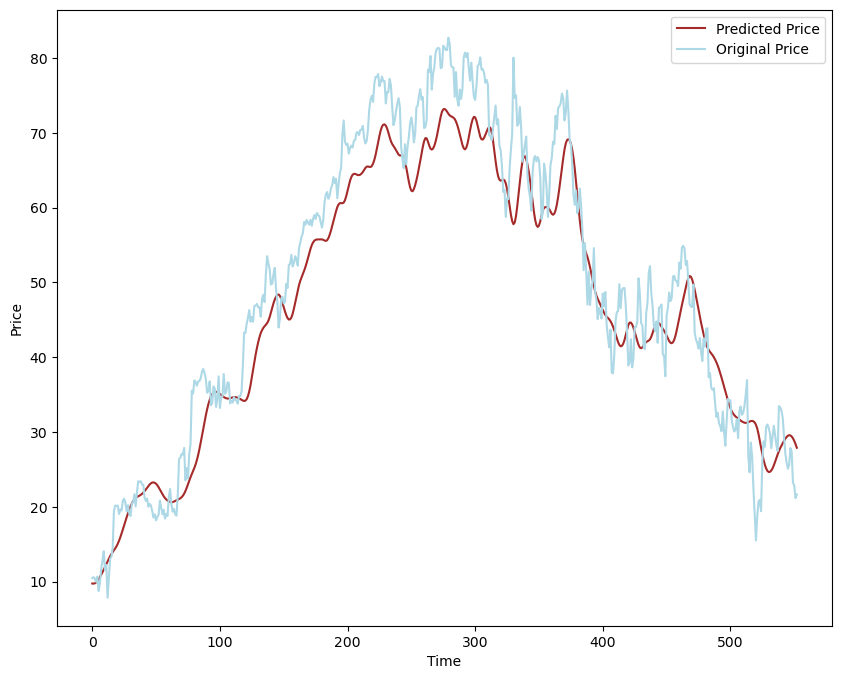

In [60]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'brown', label = 'Predicted Price')
plt.plot(y, 'Lightblue', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
model.save('Stock Market Prediction.keras')